<a href="https://colab.research.google.com/github/ronbalanay/MAT-422/blob/main/MAT422_HW_2_3_RB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3.1 Joint probability distributions

We'll model joint probability distribution using our dice example from the previous section. First, we generate all possible outcomes for rolling two dice and calculate the joint probability mass function for each pair of events.


In [ ]:

dice_values = [1, 2, 3, 4, 5, 6]

# pairs of events in two dice
sample_space = [(x, y) for x in dice_values for y in dice_values]

#joint probability is equal for all pairs
joint_probability = 1 / 36

#calculate joint probability
def P_joint(x, y):
    if (x, y) in sample_space:
        return joint_probability
    return 0

x_val = 3
y_val = 4
P_XY = P_joint(x_val, y_val)

print(f"Let S be the sample space of (X, Y): {sample_space}")
print(f"The joint probability P(X = {x_val} and Y = {y_val}) is {P_XY}.")

#marginal pmf
def P_X(x):
    return sum(P_joint(x, y) for y in dice_values)

def P_Y(y):
    return sum(P_joint(x, y) for x in dice_values)

#marginal probabilities
P_X_val = P_X(3)
P_Y_val = P_Y(4)

print(f"\nThe marginal probability P(X = 3) is {P_X_val}.")
print(f"The marginal probability P(Y = 4) is {P_Y_val}.")

print(f"\nCheck: P(X = {x_val}) * P(Y = {y_val}) = {P_X_val * P_Y_val}.")
print(f"Is this equal to the joint probability P(X = {x_val} and Y = {y_val})? {'Yes' if P_X_val * P_Y_val == P_XY else 'No'}.")

if P_X_val * P_Y_val == P_XY:
    print("\nX and Y are independent.")
else:
    print("\nX and Y are dependent.")


Let S be the sample space of (X, Y): [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
The joint probability P(X = 3 and Y = 4) is 0.027777777777777776.

The marginal probability P(X = 3) is 0.16666666666666669.
The marginal probability P(Y = 4) is 0.16666666666666669.

Check: P(X = 3) * P(Y = 4) = 0.027777777777777783.
Is this equal to the joint probability P(X = 3 and Y = 4)? No.

X and Y are dependent.


# 2.3.2 Correlation and dependence

Using the same example, we'll analyze the relationship between two random variables uusing covariance and the correlation coefficient.






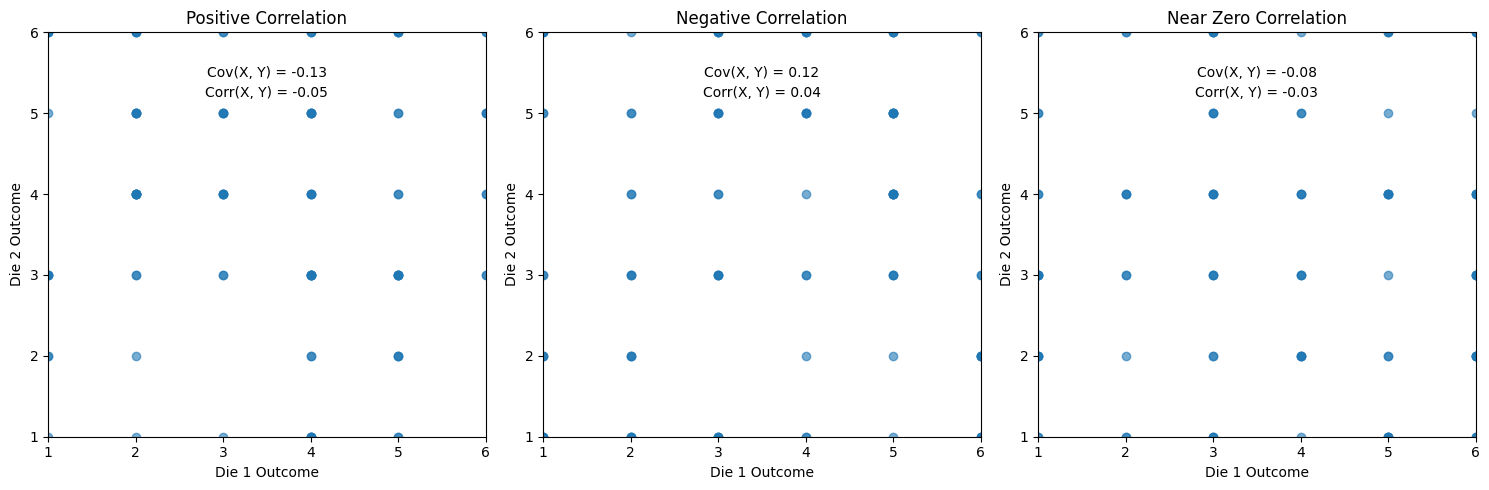

Sample Data Covariance: -2.92
Sample Data Correlation: -1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# simulate n dice rolls
def simulate_dice_rolls(n):
    die1 = np.random.randint(1, 7, n)
    die2 = np.random.randint(1, 7, n)
    return die1, die2

def covariance(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    return np.mean((X - mean_X) * (Y - mean_Y))

#correlation coefficient
def correlation(X, Y):
    return covariance(X, Y) / (np.std(X) * np.std(Y))

n = 100

#positive, negative, and zero correlation for n dice rolls
dice_rolls_positive = simulate_dice_rolls(n)
dice_rolls_negative = simulate_dice_rolls(n)
dice_rolls_zero = simulate_dice_rolls(n)

# we can create negative correlation by reversing the second dices values
X_negative, Y_negative = dice_rolls_negative
Y_negative = 7 - Y_negative

# independent event
X_zero, Y_zero = dice_rolls_zero
Y_zero = np.random.randint(1, 7, n)

data_sets = [
    (dice_rolls_positive, 'Positive Correlation'),
    (X_negative, Y_negative, 'Negative Correlation'),
    (X_zero, Y_zero, 'Near Zero Correlation')
]

plt.figure(figsize=(15, 5))

for i, (X, Y, title) in enumerate([(dice_rolls_positive[0], dice_rolls_positive[1], 'Positive Correlation'),
                                    (X_negative, Y_negative, 'Negative Correlation'),
                                    (X_zero, Y_zero, 'Near Zero Correlation')]):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X, Y, alpha=0.6)
    plt.title(title)
    plt.xlabel('Die 1 Outcome')
    plt.ylabel('Die 2 Outcome')
    plt.xlim(1, 6)
    plt.ylim(1, 6)

#calculate covariance, correlation
    cov = covariance(X, Y)
    corr = correlation(X, Y)
    plt.text(0.5, 0.9, f'Cov(X, Y) = {cov:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, 0.85, f'Corr(X, Y) = {corr:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

sample_x = np.array([1, 2, 3, 4, 5, 6])
sample_y = np.array([6, 5, 4, 3, 2, 1])
sample_cov = covariance(sample_x, sample_y)
sample_corr = correlation(sample_x, sample_y)

print(f"Sample Data Covariance: {sample_cov:.2f}")
print(f"Sample Data Correlation: {sample_corr:.2f}")


# 2.3.3 Random Samples
We'll simulate rolling a single die multiple times to create random samples of different sizes, then visualize the mean and distribution of outcomes for these sample sizes. We can see how the sample mean estimates the population mean and illustrates the central limit theorem (CLT). As sample size increases, the distribution of the sample mean approaches normality.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#roll n dice
def roll_dice(n):
    return np.random.randint(1, 7, n)

sample_sizes = [10, 30, 100]
samples = [roll_dice(n) for n in sample_sizes]

plt.figure(figsize=(15, 5))

for i, sample in enumerate(samples):
    plt.subplot(1, 3, i + 1)
    plt.hist(sample, bins=np.arange(0.5, 7.5, 1), density=True, alpha=0.6, color='b')
    plt.title(f'Die Rolls - Sample Size: {sample_sizes[i]}')
    plt.xlabel('Die Outcome')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 7))

plt.tight_layout()
plt.show()
